In [2]:
#importing dependencies
import pandas as pd
import numpy as np
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# heart_cleaned.csv is in the resource folder
data_path = '../Resources/heart_cleaned.csv'

# Load data using pandas
df_heart = pd.read_csv(data_path)

In [4]:
#Checking dataframe
df_heart.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group
0,0,3,0,0,0,0,0,0,1,1,14.54,1,0.0,30.0,16.0,12.0,4
1,3,4,0,1,0,0,0,1,0,1,28.29,0,0.0,30.0,0.0,4.0,4
2,3,4,1,0,0,0,0,1,0,1,33.47,0,4.0,12.0,3.0,16.0,3
3,0,4,1,1,0,0,0,1,0,0,28.73,0,0.0,30.0,30.0,8.0,4
4,2,4,0,0,0,0,0,0,0,0,24.37,1,0.0,8.0,4.0,0.0,4


In [5]:
#checking the dataframe
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  BMI                           308854 non-null  float64
 11  Smoking_History               308854 non-null  int64  
 12  Alcohol_Consumption           308854 non-nul

In [6]:
#checking rows and columns
df_heart.shape

(308854, 17)

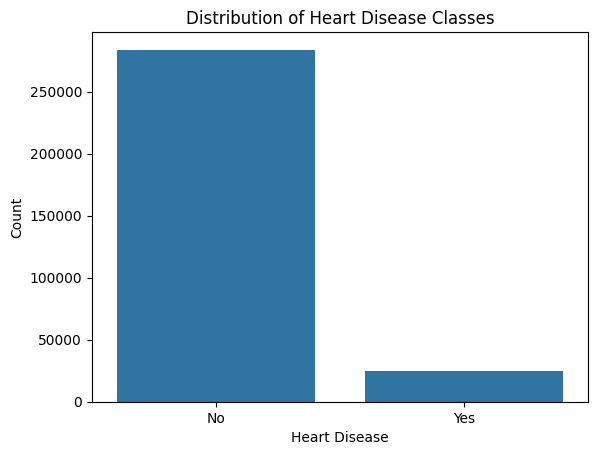

In [7]:
# showing distribution of values in heart disease (our target) column 
sns.countplot(x='Heart_Disease', data=df_heart)
plt.title('Distribution of Heart Disease Classes')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('../Images/Heart_Disease_distribution_bar.png')
plt.show()

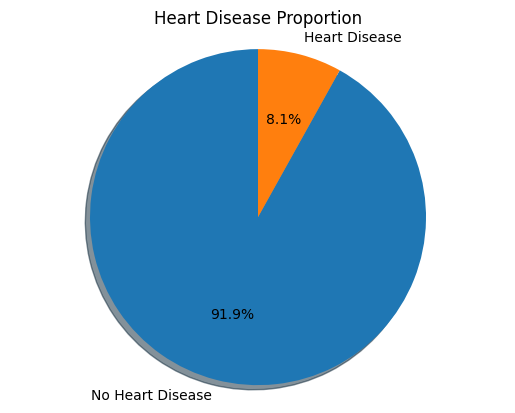

In [8]:
#Piechart showing the distribution of the values in Heart Disease column
labels = 'No Heart Disease', 'Heart Disease'
sizes = df_heart['Heart_Disease'].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Heart Disease Proportion')
plt.savefig('../Images/heart_disease_distribution_pie.png')
plt.show()

Now we set our target variable and features for the machine learning models.

In [14]:
# Get the target variable
target = df_heart["Heart_Disease"]

In [15]:
# Get the features.
heart_data = df_heart.drop("Heart_Disease", axis=1)
feature_names = heart_data.columns
feature_names


Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Age_Group'],
      dtype='object')

In [18]:
#checking final dataframe
heart_data.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Age_Group
0,0,3,0,0,0,0,0,1,1,14.54,1,0.0,30.0,16.0,12.0,4
1,3,4,0,0,0,0,1,0,1,28.29,0,0.0,30.0,0.0,4.0,4
2,3,4,1,0,0,0,1,0,1,33.47,0,4.0,12.0,3.0,16.0,3
3,0,4,1,0,0,0,1,0,0,28.73,0,0.0,30.0,30.0,8.0,4
4,2,4,0,0,0,0,0,0,0,24.37,1,0.0,8.0,4.0,0.0,4


In [17]:
#checking rows and columns
heart_data.shape

(308854, 16)

In [19]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart_data, target, random_state=70)

Now we will again recreate a model with balanced class weights as parameter

In [20]:
from sklearn.svm import SVC
# Create an SVC model with balanced class weights
model = SVC(kernel='rbf', class_weight='balanced')


# Train the model with your data
model.fit(X_train, y_train)



SVC(class_weight='balanced')

In [21]:
#making predictions with test dataset
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.712


In [23]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     70915
           1       0.20      0.81      0.32      6299

    accuracy                           0.71     77214
   macro avg       0.59      0.76      0.57     77214
weighted avg       0.91      0.71      0.78     77214



# Analysis 

After the evaluation, we see the accuracy even droped to 71% . The classification report above again suggests that the model predicted class 0  correctly (high precision) but tends to misclassify a notable portion of them as class 1 . Though the recall is higher than before but the significant difference between the model's performance metrics for classes 0 and 1 still suggests issues with model bias, potentially due to class imbalance.
In summary , while SMOTE and balanced class weights are powerful tools for combating class imbalance, their effectiveness can be influenced by the quality of features, the choice of model and its complexity, and the underlying data distribution. Further explorations and adjustments in these areas might be required to achieve significant improvements. 
Another strategy would be to try ensemble methods designed to handle imbalanced data, like Balanced Random Forest or EasyEnsemble.